In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
resp = pd.read_csv('ens_e_aval_agosto_2021_respostas.csv')
perg = pd.read_excel('ens_e_aval_agosto_2021_perguntas.xlsx')

# Retirando resposta de teste e coluna com emails dos alunos 
resp.drop([0], inplace=True)
resp.drop(['Endereço de e-mail'], axis = 1, inplace=True)
resp_num = resp.copy()
resp_num.columns = range(len(resp.columns))
resp.head()


,Carimbo de data/hora,Em qual ano você entrou na ELT?,A maioria das matérias que você está cursando pertencem a qual período?,As orientações dos professores te direcionam precisamente a estudar o que será avaliado?,Gostaria de ter avaliações mais frequentes?,Comentários pertinentes a esse contexto:,"Em geral, os experimentos práticos em laboratório facilitam a sua compreensão dos conteúdos teóricos?","Há estímulo ou motivação suficiente da metodologia de ensino, ou dos professores, para ""tentar enxergar"" a teoria nas práticas?","Você é capaz de abstrair, na maioria das práticas, os fenômenos teóricos estudados?",Comentários pertinentes a esse contexto:.1,A quantidade de momentos síncronos te satisfaz?,"Você gostaria de ter mais exemplos, a nível de prova, resolvidos pelos professores?",A quantidade de listas de exercícios te satisfaz?,"Nas aulas destinadas a dúvidas, elas são sanadas?",Gostaria de comentar o motivo?,"Até o quarto período do curso, você sente que teve um direcionamento satisfatório para as possíveis carreiras na Eng. Elétrica?","Em relação a esse direcionamento dado pelo departamento, quanto ele te motiva?",Quanto às avaliações:,Gostaria que existissem projetos práticos?,Comentários pertinentes a esse contexto:.2
1,30/08/2021 21:03:35,2020,3°,Sim,Não,NaN,Não,Não,Não,NaN,Sim,Sim,Sim,Não,NaN,Não,2,1.0,10.0,NaN
2,30/08/2021 21:04:15,2017,7°,Sim,Não,NaN,Sim,Não,Sim,NaN,Sim,Não,Não,Sim,NaN,Não,1,3.0,9.0,NaN
3,30/08/2021 21:08:02,2021,1°,Sim,Sim,NaN,Sim,Sim,Não,NaN,Não,Sim,Não,Sim,NaN,Não,4,8.0,9.0,NaN
4,30/08/2021 21:08:34,2018,5°,Não,Sim,NaN,Sim,Não,Não,NaN,Não,Sim,Não,Sim,NaN,Não,2,10.0,10.0,NaN
5,30/08/2021 21:09:11,2018,9°,Não,Sim,NaN,Sim,Não,Sim,NaN,Não,Sim,Não,Não,Estou cursando duas disciplinas quem nem seque...,Não,1,7.0,9.0,NaN


In [14]:
resp_agrup = resp.copy()

#Função para criar grupos a partir dos períodos em q cada aluno se encontra
def agrupa_alunos(row):
    val = 'Veterano'
    if row == '1°'or row =='2°'or row == '3°':
        val = 'Calouro'
    elif row == '8°'or row =='9°'or row =='10°':
        val = 'Formando'
    return val

#Aplicando função na coluna dos períodos e criando nova coluna 
resp_agrup['Respostas Agrupadas por Período'] = resp.iloc[:,2].apply(agrupa_alunos)
resp_agrup['Respostas Agrupadas por Período']

1       Calouro
2      Veterano
3       Calouro
4      Veterano
5      Formando
         ...   
103     Calouro
104    Veterano
105    Veterano
106    Veterano
107    Veterano
Name: Respostas Agrupadas por Período, Length: 107, dtype: object

In [19]:
resp_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       107 non-null    object 
 1   1       107 non-null    object 
 2   2       107 non-null    object 
 3   3       107 non-null    object 
 4   4       107 non-null    object 
 5   5       14 non-null     object 
 6   6       107 non-null    object 
 7   7       107 non-null    object 
 8   8       107 non-null    object 
 9   9       11 non-null     object 
 10  10      107 non-null    object 
 11  11      107 non-null    object 
 12  12      107 non-null    object 
 13  13      107 non-null    object 
 14  14      19 non-null     object 
 15  15      107 non-null    object 
 16  16      107 non-null    int64  
 17  17      107 non-null    float64
 18  18      107 non-null    float64
 19  19      8 non-null      object 
dtypes: float64(2), int64(1), object(17)
memory usage: 17.6+ KB


In [28]:
if resp_num[3].dtypes == object:
    print('True')
else: print('False')

True


In [35]:
# Limpeza dos dados
resp_num[2] = resp_num[2].map({'1°':1,'2°':2,'3°':3,'4°':4,'5°':5,'6°':6,'7°':7,'8°':8,'9°':9,'10°':10})

for column in resp_num.columns:
    if resp_num[column].isnull().sum() == 0 and resp_num[column].dtypes == object:
        resp_num[column] = resp_num[column].map({'Sim':1, 'Não':0})

<AxesSubplot:xlabel='2', ylabel='Count'>

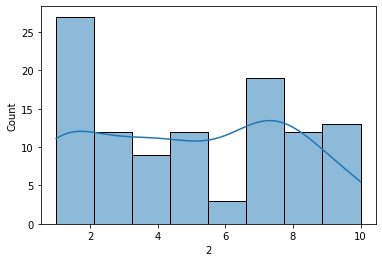

In [37]:
sns.histplot(resp_num, kde = True, x=resp_num[2].sort_values(ascending=False), stat = 'count')